# 统计推断基础
[大图](统计推断基础.html), [下载](origin_files/统计推断基础.ipynb)  
数据源：http://archive.ics.uci.edu/ml/datasets/Servo

In [1]:
import pandas as pd
import sklearn.datasets as datasets
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/servo/servo.data',
               header=None,names=['motor','screw','pgain','vgain','target'])
df.head()

,motor,screw,pgain,vgain,target
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


## 描述性统计分析

In [2]:
df.describe(include='all')

,motor,screw,pgain,vgain,target
count,167,167,167.000000,167.000000,167.000000
unique,5,5,NaN,NaN,NaN
top,C,A,NaN,NaN,NaN
freq,40,42,NaN,NaN,NaN
mean,NaN,NaN,4.155689,2.538922,1.389708
std,NaN,NaN,1.017770,1.369850,1.559635
min,NaN,NaN,3.000000,1.000000,0.131250
25%,NaN,NaN,3.000000,1.000000,0.503126
50%,NaN,NaN,4.000000,2.000000,0.731254
75%,NaN,NaN,5.000000,4.000000,1.259369


### Box Plots

In [3]:
df.plot(kind='box') # Box Plots

### 置信度区间估计

In [4]:
import statsmodels.api as sm
# 或者使用DescrStatsW
d1 = sm.stats.DescrStatsW(df.loc[:,'target'])
d1.tconfint_mean(0.05) # alpha=0.05

(1.1514267174653656, 1.6279900583430176)

## 单个变量的分布律分析
### Histograph

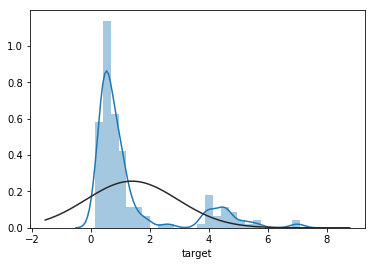

In [5]:
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.distplot(df.loc[:,'target'], kde=True, fit=stats.norm) # Histograph


### Q-Q

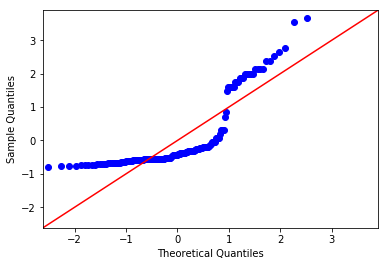

In [6]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(df.loc[:,'target'], fit=True, line='45')

### 对分布的检验

- stats.shapiro  
Shapiro–Wilk test,是一种基于相关性的检验思路，接近1，说明接近正态分布。H0：样本服从正态分布
- stats.jarque_bera
是一种基于峰度和偏度的检验思路，

In [7]:
import pandas as pd
import scipy
rv=scipy.stats.norm(loc=0,scale=1)
df_rv=pd.DataFrame(rv.rvs(size=4000),columns=['data'])

In [8]:
print('Jarque-Bera test:', stats.jarque_bera(df_rv.data)) # 返回统计量和p-value
print('Shapiro-Wilk test:', stats.shapiro(df_rv.data)) # 返回统计量和p-value
stats.kstest(rvs=df_rv.data,cdf='norm') # 返回统计量和p-value

Jarque-Bera test: (4.4578550112653224, 0.10764381563553349)
Shapiro-Wilk test: (0.999329149723053, 0.14980019629001617)


KstestResult(statistic=0.0082351142086988238, pvalue=0.9490359158328715)

# 对均值检验
http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.html

## 单样本T检验


In [9]:
't-statistic=%6.4f, p-value=%6.4f, df=%s' %d1.ttest_mean(1.15)

't-statistic=1.9862, p-value=0.0487, df=166.0'

p-value>0.05,说明不能拒绝原假设，认为均值确实是1.15

## 两样本T检验
先做个描述性统计

In [10]:
df.groupby('motor')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
motor,,,,,,,,
A,36.0,1.761111,1.822645,0.243751,0.506252,0.806255,3.899964,5.700042
B,36.0,1.681942,1.760003,0.206250,0.496877,0.806255,3.749966,5.500033
C,40.0,1.254061,1.387926,0.206250,0.506252,0.543753,1.126563,5.100014
D,22.0,0.917613,0.675960,0.281251,0.431252,0.696877,1.232811,2.699979
E,33.0,1.144893,1.568450,0.131250,0.431252,0.806255,1.100000,7.100108


挑选前两类做T检验

- 第一步:方差齐次检验

In [11]:
(_,df1),(_,df2),(_,df3),(_,_),(_,_)=df.groupby('motor')['target']
leveneTestRes = stats.levene(df1, df2, center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)

w-value=0.0099, p-value=0.9210


p-value < 0.05，说明拒绝原假设，认为方差不齐  
p-value > 0.05，说明无法拒绝原假设，认为方差齐性

- 第二步:T-test

In [12]:
# stats.stats.ttest_ind(df1, df2, equal_var=True)#scipy.stats
'statistic=%6.4f, pvalue=%6.4f, df=%6.4f'%sm.stats.ttest_ind(df1, df2, usevar='unequal')#usevar='pooled'or'unequal'

'statistic=0.1875, pvalue=0.8518, df=69.9146'

pvalue < 0.05 说明拒绝原假设，认为均值不相等
pvalue > 0.05 说明无法拒绝原假设，认为均值相等
http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

## 方差分析
- 单因素方差分析

In [13]:
sepal_length_list = []
for i in df['motor'].unique():
    sepal_length_list.append(df[df['motor'] == i]['target'])
stats.f_oneway(*sepal_length_list)

F_onewayResult(statistic=1.6337825426325907, pvalue=0.16822138464697428)

In [14]:
# 利用回归模型中的方差分析
from statsmodels.formula.api import ols
sm.stats.anova_lm(ols('target ~ C(motor)',data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(motor),4.0,15.657338,3.914335,1.633783,0.168221
Residual,162.0,388.131331,2.395872,NaN,NaN


- 多因素方差分析

In [15]:
sm.stats.anova_lm(ols('target ~ C(motor) + C(screw)',data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(motor),4.0,15.657338,3.914335,1.641291,0.166507
C(screw),4.0,11.315272,2.828818,1.186131,0.319027
Residual,158.0,376.816059,2.384912,NaN,NaN


In [16]:
ana = ols('target ~ C(motor) + C(screw) +C(motor)*C(screw)', data= df).fit()
sm.stats.anova_lm(ana)

,df,sum_sq,mean_sq,F,PR(>F)
C(motor),4.0,15.657338,3.914335,1.528429,0.197095
C(screw),4.0,11.315272,2.828818,1.104568,0.356845
C(motor):C(screw),16.0,13.151418,0.821964,0.320952,0.994113
Residual,142.0,363.664641,2.561019,NaN,NaN


## 相关分析
散点图

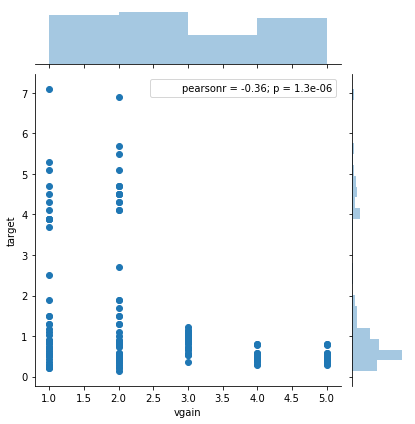

In [17]:
import seaborn as sns
sns.jointplot(x='vgain',y='target', data=df,kind='scatter')

相关性分析:“spearman”,“pearson” 和 "kendall"
- pearson用于线性相关关系
- spearman秩相关系数，不一定线性，但是单调
- kendall序数

In [18]:
df.loc[:,['pgain', 'target']].corr(method='pearson')
# df.loc[:,['pgain', 'target']].corr(method='spearman')
# df.loc[:,['pgain', 'target']].corr(method='kendall')

,pgain,target
pgain,1.000000,-0.598129
target,-0.598129,1.000000


## 卡方检验

In [19]:
cross_table=df.pivot_table(index='motor',columns='screw',values='target',aggfunc='count')
cross_table

screw,A,B,C,D,E
motor,,,,,
A,8,7,7,7,7
B,8,7,7,7,7
C,12,7,7,7,7
D,7,7,3,3,2
E,7,7,7,6,6


In [20]:
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq = %s'%stats.chi2_contingency(cross_table))

chisq = 4.6074
 p-value = 0.9974
 dof = 16
 expected_freq = [[  9.05389222   7.54491018   6.68263473   6.46706587   6.25149701]
 [  9.05389222   7.54491018   6.68263473   6.46706587   6.25149701]
 [ 10.05988024   8.38323353   7.4251497    7.18562874   6.94610778]
 [  5.53293413   4.61077844   4.08383234   3.95209581   3.82035928]
 [  8.2994012    6.91616766   6.1257485    5.92814371   5.73053892]]
